In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
coordinates[0]

(-89.25685888531541, -10.726933429674034)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [9]:
cities[0]

'hermanus'

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Define api url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | shagonar
Processing Record 5 of Set 1 | chuguyevka
Processing Record 6 of Set 1 | bryan
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | verkhoyansk
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 12 of Set 1 | wonthaggi
Processing Record 13 of Set 1 | verkhnevilyuysk
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | alto araguaia
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | chesma
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set

Processing Record 38 of Set 4 | kavieng
Processing Record 39 of Set 4 | chapais
Processing Record 40 of Set 4 | mecca
Processing Record 41 of Set 4 | neman
Processing Record 42 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 43 of Set 4 | butaritari
Processing Record 44 of Set 4 | indi
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | babanusah
City not found. Skipping...
Processing Record 47 of Set 4 | saint-francois
Processing Record 48 of Set 4 | katobu
Processing Record 49 of Set 4 | belogorsk
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | port keats
Processing Record 3 of Set 5 | camacha
Processing Record 4 of Set 5 | awbari
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | aksarayskiy
Processing Record 7 of Set 5 | nioro
Processing Record 8 of Set 5 | blyth
Processing Record 9 of Set 5 | palermo
Processing Record 10 of Set 5 | pevek
Processing Rec

Processing Record 31 of Set 8 | lazaro cardenas
Processing Record 32 of Set 8 | nouakchott
Processing Record 33 of Set 8 | pouembout
Processing Record 34 of Set 8 | oistins
Processing Record 35 of Set 8 | almeirim
Processing Record 36 of Set 8 | itamaraca
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | coquimbo
Processing Record 40 of Set 8 | manzanillo
Processing Record 41 of Set 8 | srednekolymsk
Processing Record 42 of Set 8 | prince rupert
Processing Record 43 of Set 8 | palamos
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | yaguajay
Processing Record 46 of Set 8 | hastings
Processing Record 47 of Set 8 | monrovia
Processing Record 48 of Set 8 | deputatskiy
Processing Record 49 of Set 8 | orlik
Processing Record 50 of Set 8 | aldan
Processing Record 1 of Set 9 | mahibadhoo
Processing Record 2 of Set 9 | itoman
Processing Record 3 of Set 9 | mnogovershinnyy
Processing Record 4 of Set

City not found. Skipping...
Processing Record 16 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 17 of Set 12 | nemuro
Processing Record 18 of Set 12 | puerto escondido
Processing Record 19 of Set 12 | richards bay
Processing Record 20 of Set 12 | wamba
Processing Record 21 of Set 12 | karratha
Processing Record 22 of Set 12 | cedar lake
Processing Record 23 of Set 12 | gari
Processing Record 24 of Set 12 | najran
Processing Record 25 of Set 12 | mount isa
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | tombouctou
Processing Record 28 of Set 12 | eldikan
City not found. Skipping...
Processing Record 29 of Set 12 | sechura
Processing Record 30 of Set 12 | ayan
Processing Record 31 of Set 12 | vila velha
Processing Record 32 of Set 12 | beringovskiy
Processing Record 33 of Set 12 | aquiraz
Processing Record 34 of Set 12 | san jose
Processing Record 35 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 12 | komsomol

In [11]:
len(city_data)

561

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,57.90,80,39,6.29,ZA,2021-08-15 18:38:41
1,Kavaratti,10.5669,72.6420,81.14,80,99,17.16,IN,2021-08-15 18:38:41
2,Busselton,-33.6500,115.3333,50.09,76,0,10.60,AU,2021-08-15 18:38:42
3,Shagonar,51.5333,92.8000,60.35,87,100,0.92,RU,2021-08-15 18:38:42
4,Chuguyevka,44.1653,133.8633,55.56,96,19,2.98,RU,2021-08-15 18:38:43
5,Bryan,30.6744,-96.3700,90.77,72,90,20.71,US,2021-08-15 18:38:43
6,Hilo,19.7297,-155.0900,78.80,82,68,4.00,US,2021-08-15 18:38:43
7,Verkhoyansk,67.5447,133.3850,46.29,85,100,2.35,RU,2021-08-15 18:38:44
8,Ushuaia,-54.8000,-68.3000,51.46,58,40,3.44,AR,2021-08-15 18:38:44
9,Ilulissat,69.2167,-51.1000,48.22,81,20,10.36,GL,2021-08-15 18:38:44


In [13]:
# Rearrange the columns
new_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2021-08-15 18:38:41,-34.4187,19.2345,57.90,80,39,6.29
1,Kavaratti,IN,2021-08-15 18:38:41,10.5669,72.6420,81.14,80,99,17.16
2,Busselton,AU,2021-08-15 18:38:42,-33.6500,115.3333,50.09,76,0,10.60
3,Shagonar,RU,2021-08-15 18:38:42,51.5333,92.8000,60.35,87,100,0.92
4,Chuguyevka,RU,2021-08-15 18:38:43,44.1653,133.8633,55.56,96,19,2.98
5,Bryan,US,2021-08-15 18:38:43,30.6744,-96.3700,90.77,72,90,20.71
6,Hilo,US,2021-08-15 18:38:43,19.7297,-155.0900,78.80,82,68,4.00
7,Verkhoyansk,RU,2021-08-15 18:38:44,67.5447,133.3850,46.29,85,100,2.35
8,Ushuaia,AR,2021-08-15 18:38:44,-54.8000,-68.3000,51.46,58,40,3.44
9,Ilulissat,GL,2021-08-15 18:38:44,69.2167,-51.1000,48.22,81,20,10.36


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1629052949.3644702

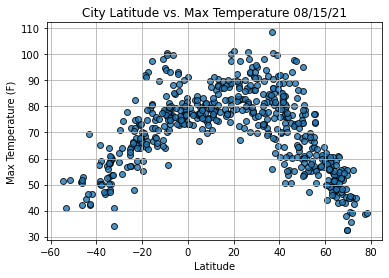

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

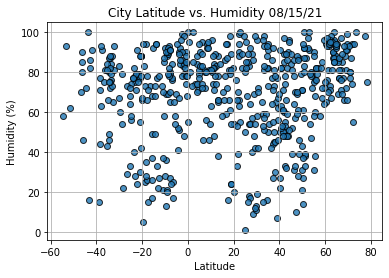

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

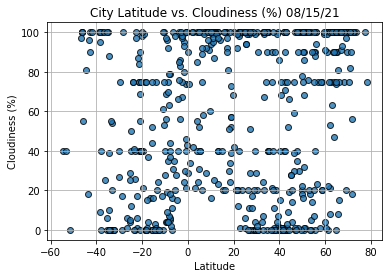

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

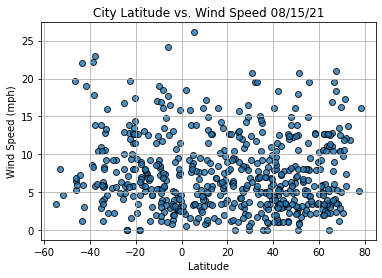

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
from scipy.stats import linregress

In [30]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

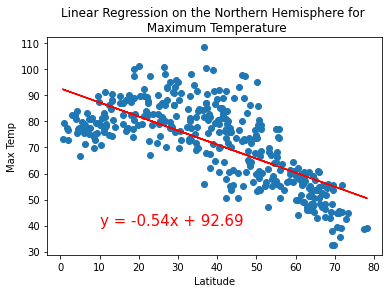

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n Maximum Temperature', 'Max Temp',(10,40))

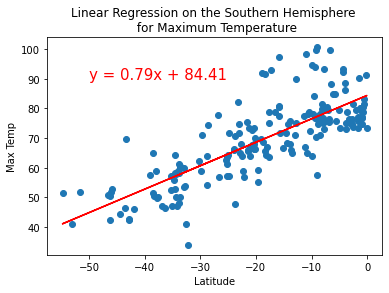

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

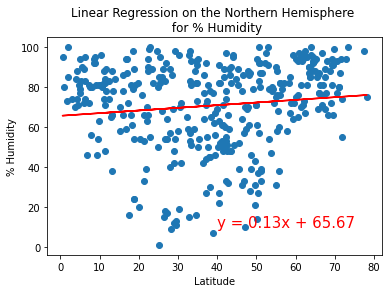

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

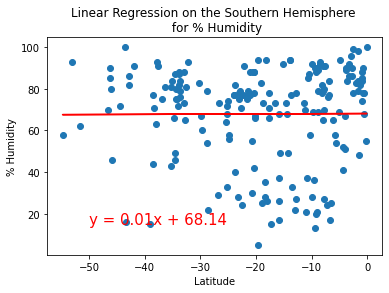

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

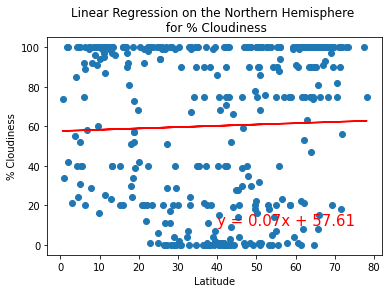

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (40,10))

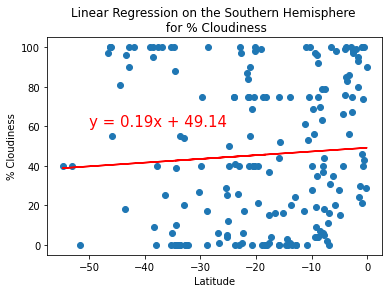

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness',
                       (-50,60))

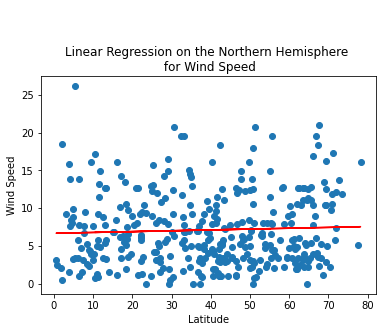

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (40,35))

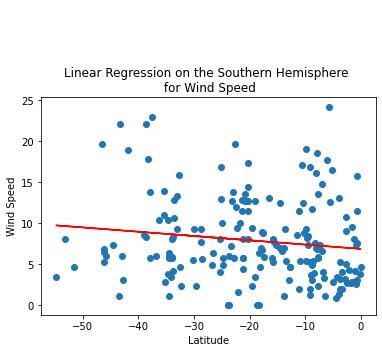

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed',
                       (-50,35))